In [3]:
import os
import json
import pandas as pd

Které knihy jsou ve srovnání: česká fikce a non-fikce vydaná v letech 2023 a 2024, u které se podařilo načíst ISBN z Martinus.cz a prostřednictvím tohoto ISBN stáhnout data z Goodreads a Databáze knih.

## Goodreads

In [25]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))

In [207]:
gr.columns

Index(['GR_isbn', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count',
       'GR_reviews', 'GR_published'],
      dtype='object')

In [208]:
gr = gr.sort_values(by='GR_date')

In [209]:
gr['GR_date'].max()

'2024-09-09 04:01:16'

In [27]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [211]:
gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1]

GR_date
2024-09-15    732
2024-09-08    728
2024-09-01    720
Freq: -1W-SUN, Name: GR_isbn, dtype: int64

In [212]:
gr_nejnovejsi = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1].index.to_list()[1]

In [213]:
gr_nejnovejsi

Timestamp('2024-09-08 00:00:00')

In [214]:
starsi = gr[gr['GR_date'] <= str(gr_nejnovejsi)]['GR_title'].to_list()

In [215]:
novinky = gr[~gr['GR_title'].isin(starsi)]['GR_title'].to_list()
print("Novinky " + str(gr_nejnovejsi)[0:10] + "\n-", end =" ")
print('\n- '.join(novinky))

Novinky 2024-09-08
- Indie: Královna z Džhánsí by Veronika Válková
- Základy moderní Evropy: lekce z kulturní historie by Jiří Hanuš
- Panovníci zemí českých by Petr Dvořáček
- Promrhaná něha by Jan Šimek
- Zpověď stárnoucí trosky, která má psa by Eva Michorová
- Otilie Vranská by Radek Galaš


### Nejlépe hodnocené knihy vůbec

In [216]:
gr[gr['GR_ratings_count'] >= 100].groupby('GR_title')['GR_rating'].last().nlargest(30)

GR_title
U severní zdi by Petra Klabouchová                                                     4.72
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    4.70
V pasti pohlaví by Silvie Lauder                                                       4.60
Stačí mávnout křídly (Stačí mávnout křídly, #1) by Sára Topinková                      4.49
Severka by Nina Špitálníková                                                           4.44
Lásky čas by Adéla Rosípalová                                                          4.43
Budoucnost nepráce by Filip Dřímalka                                                   4.40
Rozložíš paměť by Marek Torčík                                                         4.38
Zvonkohra by Eliška Václavíková                                                        4.38
Nebuď p*ča aneb jak (ne)pracovat s dětmi by Tomáš Morávek                              4.31
Srpny by Jakub Stanjura                                                

### Nejvíce hodnocení

In [217]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Srpny by Jakub Stanjura                                                                     1317.0
Severka by Nina Špitálníková                                                                1021.0
Těla by Klára Vlasáková                                                                      953.0
Rozložíš paměť by Marek Torčík                                                               801.0
Kde jsi, když nejsi by Radka Třeštíková                                                      627.0
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                          575.0
Gazely by Patrik Hartl                                                                       519.0
Fosilie by Michal Kašpárek                                                                   506.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická          490.0
U severní zdi by Petra Klabouchová                                                           451.0
L

### Nejvíce nových hodnocení od dubna '24

In [218]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                         500.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    437.0
Severka by Nina Špitálníková                                                           406.0
Srpny by Jakub Stanjura                                                                381.0
Odvaha by Markéta Lukášková                                                            264.0
Těla by Klára Vlasáková                                                                229.0
Fosilie by Michal Kašpárek                                                             188.0
Lásky čas by Adéla Rosípalová                                                          183.0
Gazely by Patrik Hartl                                                                 181.0
U severní zdi by Petra Klabouchová                                                     139.0
V pasti pohlaví by Silvie Lauder                             

In [31]:
import datetime

In [220]:
two_weeks_ago = datetime.datetime.now() - datetime.timedelta(days=13)
two_weeks_ago = two_weeks_ago.strftime('%Y-%m-%d')

In [221]:
week_ago = datetime.datetime.now() - datetime.timedelta(days=6)
week_ago = week_ago.strftime('%Y-%m-%d')

In [33]:
month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)
month_ago = month_ago.strftime('%Y-%m-%d')
month_ago

'2024-08-11'

In [223]:
gr_stare = gr[gr['GR_date'] < month_ago]['GR_title'].drop_duplicates().to_list()
gr_nove = gr[~gr['GR_title'].isin(gr_stare)]['GR_title'].drop_duplicates().to_list()
gr_nove

['Zmije v garáži by Magda Jogheeová',
 'Expanzní sektor (Centrální impérium: Omega, #2) by Jan Kotouč',
 'Silvuple by Ewald Murrer',
 'Minout se přesně by Petr Hruška',
 'Vynucených 7 dní by Lenka Hnátová',
 'Myšlenky zločince v české kotlině by Jiřina Hofmanová',
 'Krvavý Žižkov by Simona Bohatá',
 'Skutečné zločiny v Brně a okolí by Ivana Žáková',
 'Lež má krátké nohy by Karol Efraim Sidon',
 '#Nezapomeň. Příběhy Paměti národa by Irena Tatíčková',
 'Květ zla (Nevěsta na útěku, #3) by Alexander Stainforth',
 'České sklo by Marek Toman',
 'Nevěsta na útěku (Nevěsta na útěku, #1) by Alexander Stainforth',
 'Jak se líčit v nemoci by Iryna Zahladko',
 'Řeč mrtvejch / Erzherz / Nebožky by Radek Fridrich',
 'Past na ženicha (Nevěsta na útěku, #2) by Alexander Stainforth',
 'Zeptej se vědce: Neexistují blbé otázky by Aleš Dvořák',
 'Endometrióza v otázkách a odpovědích by Jan Drahoňovský',
 'Exploring the Benefits of Nature on Mental Health by Oheta Sophia',
 'Prý musím projít březovým lesem

### Nejvíce hodnocení za poslední měsíc

In [224]:
goodreads_mesic_ratings = pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] > month_ago].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_ratings = goodreads_mesic_ratings[goodreads_mesic_ratings >= 10]
goodreads_mesic_ratings

GR_title
Srpny by Jakub Stanjura                                                                86.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    84.0
Rozložíš paměť by Marek Torčík                                                         82.0
Severka by Nina Špitálníková                                                           63.0
Odvaha by Markéta Lukášková                                                            60.0
Poslední léto by Dorota Ambrožová                                                      41.0
Fosilie by Michal Kašpárek                                                             38.0
Těla by Klára Vlasáková                                                                35.0
Gazely by Patrik Hartl                                                                 33.0
Lásky čas by Adéla Rosípalová                                                          27.0
Letní bouřky by Klára Pospíšilová                                      

In [225]:
goodreads_mesic_novinky = pd.Series(gr[gr['GR_title'].isin(gr_nove)].groupby("GR_title")['GR_ratings_count'].max() - gr[(gr['GR_title'].isin(gr_nove)) & (gr['GR_date'] > month_ago)].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_novinky = goodreads_mesic_novinky[goodreads_mesic_novinky >= 3]
goodreads_mesic_novinky

GR_title
Vynucených 7 dní by Lenka Hnátová    5.0
Minout se přesně by Petr Hruška      3.0
Name: GR_ratings_count, dtype: float64

### Nejvíce hodnocení v posledním týdnu a dvou

In [226]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < week_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Srpny by Jakub Stanjura                                                                20.0
Odvaha by Markéta Lukášková                                                            16.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    15.0
Těla by Klára Vlasáková                                                                13.0
Poslední léto by Dorota Ambrožová                                                       9.0
Rozložíš paměť by Marek Torčík                                                          8.0
Léto mezi řádky by Alena Štraubová                                                      7.0
Černobyl: Pád Atomgradu by Matyáš Namai                                                 7.0
Kde jsi, když nejsi by Radka Třeštíková                                                 6.0
Severka by Nina Špitálníková                                                            6.0
Gazely by Patrik Hartl                                                 

In [227]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Srpny by Jakub Stanjura                                                                41.0
Odvaha by Markéta Lukášková                                                            29.0
Rozložíš paměť by Marek Torčík                                                         28.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    28.0
Severka by Nina Špitálníková                                                           22.0
Těla by Klára Vlasáková                                                                22.0
Poslední léto by Dorota Ambrožová                                                      18.0
Letní bouřky by Klára Pospíšilová                                                      11.0
Léto mezi řádky by Alena Štraubová                                                     11.0
Fosilie by Michal Kašpárek                                                             10.0
Gazely by Patrik Hartl                                                 

### Pokus s time series

In [228]:
vyvoj = gr[['GR_date','GR_title','GR_ratings_count','GR_rating']]
vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])
vyvoj = vyvoj.sort_values(by='GR_date')
vyvoj = vyvoj.set_index('GR_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_23888\4007299537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])


<Axes: xlabel='GR_date'>

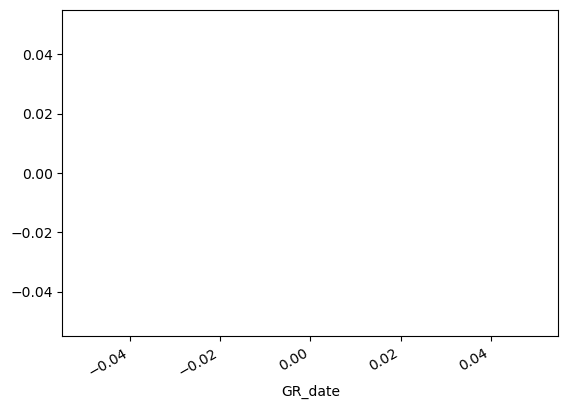

In [229]:
vyvoj[vyvoj['GR_title'].str.contains('Duše národa',na=False)]['GR_ratings_count'].plot()

<Axes: xlabel='GR_date'>

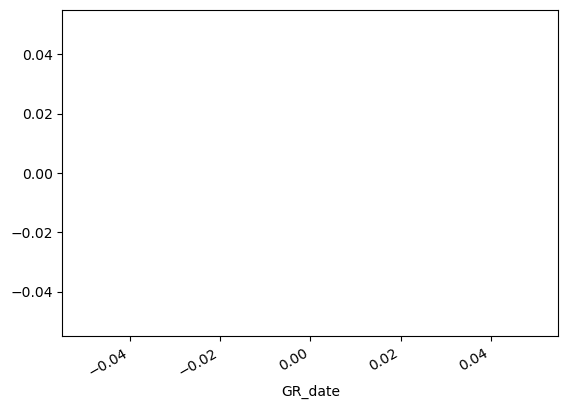

In [230]:
vyvoj[vyvoj['GR_title'].str.contains('Reportér',na=False)]['GR_rating'].plot()

<Axes: xlabel='GR_date'>

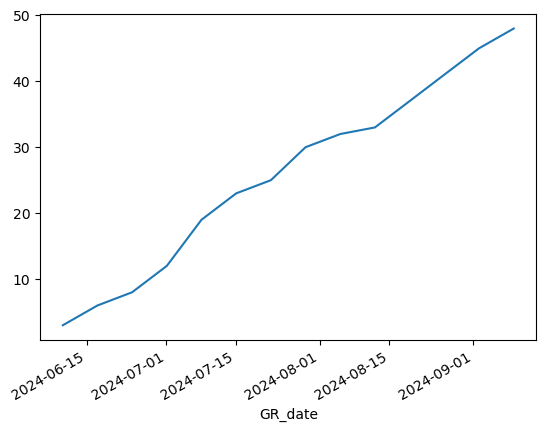

In [231]:
vyvoj[vyvoj['GR_title'].str.contains('Pacanka',na=False)]['GR_ratings_count'].plot()

### Další pokusy

In [232]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [233]:
tydny = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_ratings_count'].sum()
tydny

GR_date
2024-04-07    36632.0
2024-04-14    24847.0
2024-04-21    12856.0
2024-04-28    12964.0
2024-05-05    13236.0
2024-05-12    13890.0
2024-05-19    14266.0
2024-05-26    14562.0
2024-06-02    14983.0
2024-06-09    15329.0
2024-06-16    15749.0
2024-06-23    16109.0
2024-06-30    16324.0
2024-07-07    16739.0
2024-07-14    17279.0
2024-07-21    18029.0
2024-07-28    18238.0
2024-08-04    18808.0
2024-08-11    19056.0
2024-08-18    19455.0
2024-08-25    20045.0
2024-09-01    20290.0
2024-09-08    20706.0
2024-09-15    20620.0
Freq: W-SUN, Name: GR_ratings_count, dtype: float64

In [234]:
monthly_sum = tydny.resample('M').sum()
monthly_sum

C:\Users\micha\AppData\Local\Temp\ipykernel_23888\2088204097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = tydny.resample('M').sum()


GR_date
2024-04-30    87299.0
2024-05-31    55954.0
2024-06-30    78494.0
2024-07-31    70285.0
2024-08-31    77364.0
2024-09-30    61616.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [235]:
monthly_diff = monthly_sum.diff()
monthly_diff

GR_date
2024-04-30        NaN
2024-05-31   -31345.0
2024-06-30    22540.0
2024-07-31    -8209.0
2024-08-31     7079.0
2024-09-30   -15748.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [236]:
gr

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published
0,9.788024e+12,2024-04-01 14:11:25,Sochař by Artur Janoušek,2.00,2.0,1.0,"January 1, 2023"
1,9.788088e+12,2024-04-01 14:11:30,I smutek byl jen sen. Poezie Josefa Kocourka b...,4.00,1.0,0.0,"January 1, 2023"
2,9.788073e+12,2024-04-01 14:11:34,Hranice zvrhlosti by Jan Urban,3.29,14.0,3.0,"May 15, 2023"
3,9.788091e+12,2024-04-01 14:11:37,Z pera knihomolů: 11 povídek od českých a slov...,3.86,140.0,29.0,"March 31, 2023"
4,9.788076e+12,2024-04-01 14:11:43,"Stará béčková legenda (Stará béčková legenda, ...",4.21,19.0,6.0,"April 3, 2023"
...,...,...,...,...,...,...,...
16545,9.788025e+12,2024-09-09 04:01:04,Trnitá kletba by Anežka Kočová,4.08,77.0,18.0,"August 31, 2023"
16546,9.788072e+12,2024-09-09 04:01:08,Zuta a svlečena by Milan Ohnisko,4.00,5.0,0.0,"January 1, 2023"
16547,9.788026e+12,2024-09-09 04:01:10,Pod Kaštanem by Barbora Majchráková,3.00,6.0,2.0,"June 15, 2023"
16548,9.788028e+12,2024-09-09 04:01:14,V hrůze a krvi zrozeni by Kevin Wulfric Scherrer,3.46,13.0,1.0,"January 25, 2023"


In [237]:
prvni = gr.groupby('GR_title')['GR_date'].min()
prvni = prvni[prvni < '2024-04-22']
prvni = prvni.index.to_list()

In [238]:
pocitaci_zaklad = gr[~gr['GR_title'].isin(prvni)][['GR_date','GR_title','GR_rating','GR_ratings_count']].sort_values(by='GR_date')
pocitaci_zaklad

,GR_date,GR_title,GR_rating,GR_ratings_count
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0
3663,2024-04-29 02:00:07,Boží potměšilost by Zdeněk Řehák,2.00,1.0
3785,2024-04-29 02:08:35,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.33,9.0
3893,2024-04-29 02:21:26,Starý paní mají v ústech porcelán by Monika Ti...,3.00,1.0
3909,2024-04-29 02:22:16,Domeček pro panenky by Ivan Wernisch,5.00,1.0
...,...,...,...,...
16520,2024-09-09 03:59:51,"Cesta dvou, Afrika by Tom Jurka",5.00,5.0
16529,2024-09-09 04:00:19,Jitřní záře by Dan Wlodarzcyk,3.50,2.0
16535,2024-09-09 04:00:34,Ještě jeden level by Ondřej Trhoň,4.43,21.0
16541,2024-09-09 04:00:54,…a přeskočila jiskra by Halina Pawlowská,0.00,0.0


In [239]:
pocitaci_zaklad['tydnu'] = pocitaci_zaklad.groupby('GR_title').cumcount() + 1

In [240]:
pocitaci_zaklad.sort_values(by="tydnu")

,GR_date,GR_title,GR_rating,GR_ratings_count,tydnu
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.0,0.0,1
11011,2024-07-22 02:34:33,Rodičovství jako cesta by Alena Vávrová,0.0,0.0,1
10978,2024-07-22 02:25:38,Účetnictví pro úplné začátečníky 2024 by Pavel...,4.0,1.0,1
10939,2024-07-22 02:17:15,"Osvěta, kultura, zábava: Kulturní domy v Česko...",0.0,0.0,1
10927,2024-07-22 02:13:32,Česká fonická poezie by Pavel Novotný,0.0,0.0,1
...,...,...,...,...,...
15892,2024-09-09 02:27:59,Psychologie pro každý den aneb Co nás ve škole...,0.0,0.0,20
16457,2024-09-09 03:51:50,Starý paní mají v ústech porcelán by Monika Ti...,3.0,2.0,20
15774,2024-09-02 03:52:14,Domeček pro panenky by Ivan Wernisch,5.0,1.0,20
16055,2024-09-09 03:21:06,Šaman ze země mamutů by Pavel Radosta,4.0,2.0,20


<Axes: xlabel='tydnu'>

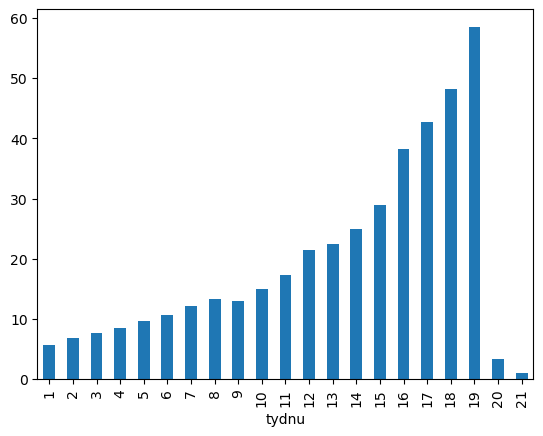

In [241]:
pocitaci_zaklad.groupby('tydnu')['GR_ratings_count'].mean().plot.bar()

<Axes: xlabel='tydnu'>

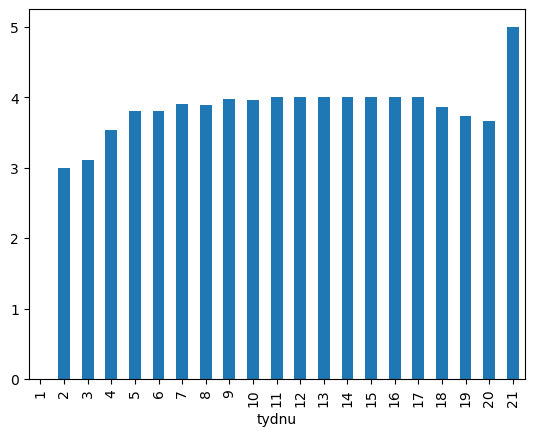

In [242]:
pocitaci_zaklad.groupby('tydnu')['GR_rating'].median().plot.bar()

In [243]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'GR_ratings_count'}, xlabel='tydnu'>

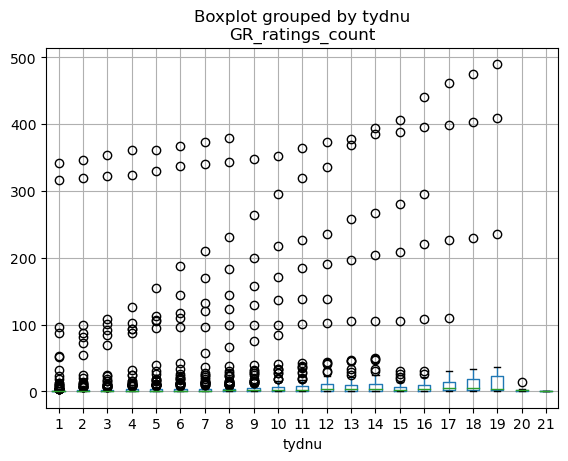

In [244]:
pocitaci_zaklad.boxplot(column='GR_ratings_count', by='tydnu')

## Databáze knih

In [245]:
x = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [246]:
x

,M_titul,M_autorstvo,M_ebook,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Jindřich Chalupecký. Texty a kontexty kritika ...,Tomáš Pospiszyl,False,Kritik a teoretik umění Jindřich Chalupecký (1...,396.0,brožovaná vazba,150×220 mm,513 g,9788088366478,2023,...,None,None,NaN,None,None,None,None,None,None,None
1,Hra s formami 2,Eduardo Duran,False,"Vedomie je individuálne vnímanie, ktoré má kaž...",404.0,brožovaná vazba,135×205 mm,510 g,9798373986052,2023,...,None,None,NaN,None,None,None,None,None,None,None
2,"Práce, odvody a mzdy bez chyb, pokut a penále ...",None,False,Firemní školky jako benefit - Někteří zaměstna...,112.0,brožovaná vazba,None,None,9771801993457,2024,...,None,None,NaN,None,None,None,None,None,None,None
3,Daně v podnikání,Alena Vančurová Hana Zídková,/687657-dane-v-podnikani/e-kniha,"Publikace vychází již podruhé, v aktualizované...",368.0,brožovaná vazba,155×235 mm,544 g,9788076763593,2022,...,None,None,NaN,None,None,None,None,None,None,None
4,Budoucnost začíná teď,Lukáš Bujna,False,Během pandemie covidu si husitský farář a básn...,248.0,brožovaná vazba,150×210 mm,None,9788090788145,2023,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12723,V severnom vetre čítaš správy ďaleké,Martin Odler,False,Kniha V severnom vetre čítaš správy ďaleké je ...,208.0,pevná vazba,154×226 mm,490 g,9788082450296,2023,...,None,None,NaN,None,None,None,None,None,None,None
12724,Louka a spousta tance,Jakub Klikar,False,"Tato básnická sbírka obsahující třicet básní, ...",40.0,brožovaná vazba,140×210 mm,76 g,9788075682079,2020,...,None,None,NaN,None,None,None,None,None,None,None
12725,Z čeho je den,Dominika Prejdová,/708043-z-ceho-je-den/e-kniha,Román Dominiky Prejdové popisuje dynamiku a mi...,264.0,pevná vazba,135×208 mm,40 g,9788024275772,2021,...,None,None,NaN,None,None,None,None,None,None,None
12726,Krvavý Žižkov,Martin Reiner,/2879115-krvavy-zizkov/e-kniha,"Krvavý Žižkov je antologie, která má svého pře...",256.0,pevná vazba,150×210 mm,604 g,9788072279012,2024,...,None,None,NaN,None,None,None,None,None,None,None


In [5]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))

In [17]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených'],
      dtype='object')

In [23]:
    month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)


NameError: name 'gr' is not defined

In [21]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']
dk['skore']

0         48.0
1        610.0
2         52.0
3        229.0
4         51.0
         ...  
34859     13.0
34860    115.0
34861     91.0
34862    120.0
34863     94.0
Name: skore, Length: 34864, dtype: float64

In [13]:
dk.sample(10)

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených
15432,9.788027e+12,2024-06-10 03:34:57,Sociální patologie,86.0,34.0,"['Literatura naučná', 'Sociologie, společnost'...",1.0,53.0,3.0,19.0,29.0,6.0,1.0,1.0
33861,9.788088e+12,2024-09-09 04:08:26,Bubeneč / Dejvice: Siamská dvojčata pražského ...,70.0,2.0,"['Literatura naučná', 'Historie']",NaN,2.0,NaN,3.0,1.0,1.0,NaN,NaN
18686,9.788088e+12,2024-06-24 03:22:33,Na hraně apokalypsy,83.0,18.0,"['Romány', 'Literatura česká', 'Sci-fi', 'spac...",5.0,18.0,3.0,29.0,22.0,13.0,NaN,3.0
11621,9.788024e+12,2024-05-20 03:07:27,Liechtensteinové: Pevně a stále,80.0,6.0,"['Literatura faktu', 'Literatura naučná', 'His...",NaN,4.0,NaN,5.0,3.0,1.0,NaN,1.0
10531,9.788076e+12,2024-05-13 03:14:10,Cestovní náhrady v 321 příkladech,100.0,1.0,"['Literatura naučná', 'Ekonomie a obchod', 'Pr...",NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
6389,9.788076e+12,2024-04-19 23:51:09,Sport je bolest,92.0,12.0,[],9.0,20.0,2.0,14.0,29.0,19.0,NaN,5.0
33500,9.788075e+12,2024-09-09 04:03:16,Stoletá válka 2. díl: Francouzské vítězství,96.0,11.0,"['Válečné', 'Literatura naučná', 'Historie']",NaN,13.0,1.0,18.0,3.0,5.0,NaN,3.0
11138,9.788076e+12,2024-05-13 03:20:03,Srdce z kamene,64.0,5.0,"['Pro ženy', 'Literatura česká', 'Fantasy', 'h...",NaN,6.0,1.0,26.0,5.0,NaN,NaN,2.0
27987,9.788091e+12,2024-08-12 03:46:48,Zrození metropole,87.0,3.0,"['Literatura naučná', 'Obrazové publikace', 'H...",NaN,6.0,NaN,2.0,5.0,5.0,NaN,NaN
25481,9.788024e+12,2024-07-29 03:27:11,Řeka pod hladinou: Vědomím proti času,72.0,92.0,"['Literatura česká', 'Biografie a memoáry', 'p...",8.0,114.0,26.0,63.0,136.0,38.0,1.0,5.0


In [248]:
gr['GR_title'].nunique()

748

In [249]:
dk['DK_titul'].nunique()

1493

In [250]:
dk

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,29.0,6.0,NaN,NaN
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",3.0,400.0,56.0,150.0,210.0,60.0,9.0,22.0
2,9.788072e+12,2024-04-01 14:39:25,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,18.0,3.0,NaN,3.0
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,91.0,50.0,['autobiografické prvky'],2.0,59.0,1.0,13.0,170.0,45.0,NaN,5.0
4,9.788024e+12,2024-04-01 14:39:27,Sochař,81.0,19.0,[],1.0,28.0,2.0,46.0,23.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34859,9.788072e+12,2024-09-09 04:16:31,Zuta a svlečena,80.0,5.0,"['Literatura česká', 'Poezie']",NaN,5.0,NaN,1.0,8.0,1.0,1.0,NaN
34860,9.788075e+12,2024-09-09 04:16:31,Ostří ozvěny,79.0,63.0,"['Romány', 'Literatura česká', 'Sci-fi']",NaN,95.0,3.0,80.0,20.0,16.0,1.0,2.0
34861,9.788024e+12,2024-09-09 04:16:32,Ve škole i za školou,78.0,51.0,"['Povídky', 'Literatura česká']",NaN,68.0,7.0,39.0,23.0,6.0,NaN,3.0
34862,9.788026e+12,2024-09-09 04:16:32,Pod Kaštanem,78.0,52.0,"['Romány', 'Pro ženy', 'Literatura česká']",NaN,65.0,4.0,71.0,55.0,7.0,2.0,4.0


In [251]:
len(dk)

34864

In [252]:
len(dk.drop_duplicates())

34864

In [253]:
dk['DK_date'].max()

'2024-09-09 04:16:32'

In [254]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [255]:
novinky

['Indie: Královna z Džhánsí by Veronika Válková',
 'Základy moderní Evropy: lekce z kulturní historie by Jiří Hanuš',
 'Panovníci zemí českých by Petr Dvořáček',
 'Promrhaná něha by Jan Šimek',
 'Zpověď stárnoucí trosky, která má psa by Eva Michorová',
 'Otilie Vranská by Radek Galaš']

In [256]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených'],
      dtype='object')

In [257]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených'],
      dtype='object')

In [258]:
dk_nove = dk[dk['DK_date'] < '2024-04-22']['DK_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['DK_titul'].isin(dk_nove)]

In [259]:
pocitame_dk = dk_nove[['DK_titul','DK_date','DK_rating','DK_ratings_count','DK_Chystám_se_číst']]

In [260]:
pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_23888\4289471237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1


<Axes: xlabel='tydnu'>

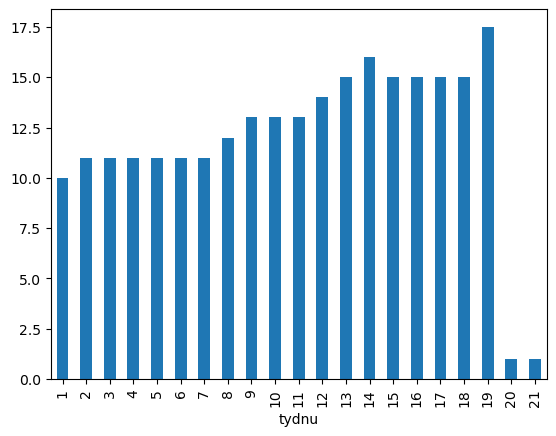

In [261]:
pocitame_dk.groupby('tydnu')['DK_Chystám_se_číst'].median().plot.bar()

<Axes: xlabel='tydnu'>

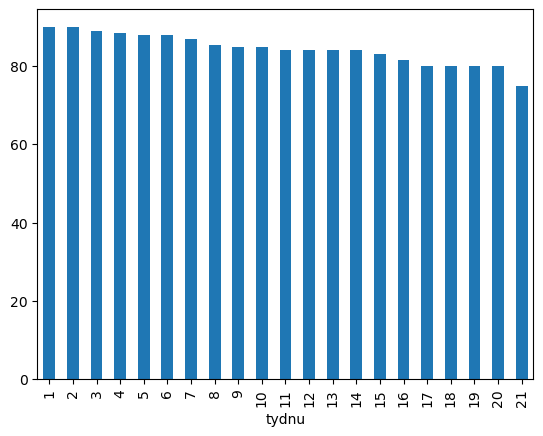

In [262]:
pocitame_dk.groupby('tydnu')['DK_rating'].median().plot.bar()

In [263]:
gr['autorstvo'] = gr['GR_title'].apply(lambda x: x.split(' by ')[1].strip())

In [264]:
gr['autorstvo']

0                Artur Janoušek
1                Josef Kocourek
2                    Jan  Urban
3                Eliška Hronová
4                Shigor Birdman
                  ...          
16545             Anežka Kočová
16546             Milan Ohnisko
16547       Barbora Majchráková
16548    Kevin Wulfric Scherrer
16549        Alena Mornštajnová
Name: autorstvo, Length: 16550, dtype: object

In [265]:
import numpy as np

In [356]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [357]:
df['isbn'] = df['M_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [359]:
df

,index,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,...,M_edice,M_věkové_doporučení,M_ilustrace,M_vydání,M_překlad,M_originální_název,M_účel_knihy,M_ostatní,M_předběžné_datum_vydání,isbn
0,0,Mezibořští Čiperové,Jiří Vodička,Víte co to jsou Španělské mušky? Jak využít v ...,"[naději, senioři, láska]",88.0,brožovaná vazba,129×199 mm,118 g,9.788088e+12,...,None,NaN,None,None,None,None,None,None,NaN,9788088422211
1,1,Putin,Roman Rops-Tůma,Velká národní poéma z pera Romana Ropse-Tůmy. ...,None,52.0,brožovaná vazba,120×230 mm,70 g,9.788088e+12,...,None,NaN,None,None,None,None,None,None,NaN,9788087705810
2,2,Falešná Pařížanka 2,Kamila Boudová,Falešná Pařížanka Kamila Boudová se vrací s no...,"[ze života, rodinné vztahy, Paříž]",176.0,pevná vazba,147×183 mm,362 g,9.788076e+12,...,None,NaN,None,None,None,None,None,None,NaN,9788076175662
3,3,Slunečná noc,Jan Skalík,Slunečná noc není jen pouhým souzněním dvou pr...,None,64.0,brožovaná vazba,140×210 mm,None,9.788075e+12,...,None,NaN,None,None,None,None,None,None,NaN,9788074752094
4,4,Boží potměšilost,Zdeněk Řehák,Doktor Richter a doktor Jon jsou dva mladí pra...,"[životní plány, lékařské prostředí, dovolená, ...",280.0,pevná vazba,120×200 mm,None,9.788028e+12,...,None,NaN,None,None,None,None,None,None,NaN,9788027904853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,15,Mestské legendy,Jiří Linhart,Spoznajte tie najhrôzostrašnejšie mestské lege...,[legendy],48.0,pevná vazba,215×280 mm,504 g,9.788000e+12,...,None,12.0,Miloš Mazal,None,Alena Naďová,None,None,None,NaN,9788000055886
717,16,Nebeská řeka,Adriana River,Co když je svět úplně jiný a skrývá temná a dě...,"[nebezpečí, láska]",312.0,pevná vazba,145×205 mm,504 g,9.788025e+12,...,None,13.0,None,None,None,None,None,None,NaN,9788025356777
718,17,#SLEDUJmě,Lena Valenová,"Příběh o přátelství, lásce a důležitých rozhod...","[rozhodnutí, Anglie, přátelství, láska]",328.0,brožovaná vazba,130×200 mm,368 g,9.788077e+12,...,None,13.0,None,None,None,None,None,None,NaN,9788076504776
719,18,Černý Bert,Tomáš Moravec,S Bertem vám nuda nikdy nehrozí. Doporučuje de...,[psi],248.0,pevná vazba,145×205 mm,554 g,9.788026e+12,...,None,12.0,None,None,None,None,None,None,NaN,9788026442233


In [358]:
df['isbn']

0      9788088422211
1      9788087705810
2      9788076175662
3      9788074752094
4      9788027904853
           ...      
716    9788000055886
717    9788025356777
718    9788076504776
719    9788026442233
720    9788027124978
Name: isbn, Length: 717, dtype: object

In [268]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']

In [269]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'isbn', 'skore'],
      dtype='object')

In [270]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_ebook', 'M_anotace', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_datum', 'M_soubor', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho',
       'M_e-kniha', 'M_přečtená', 'M_styl', 'M_originální_název',
       'M_věkové_doporučení', 'M_audiokniha', 'M_ilustrace', 'M_účel_knihy',
       'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad', 'M_ostatní',
       'M_příloha', 'M_jazyková_úroveň', 'M_editoři', 'M_knižní_předloha',
       'isbn'],
      dtype='object')

### Nejvíce nových hodnocení od dubna '24

In [271]:
def hezky_titul(row):
    try:
        autorstvo = df[df['isbn'] == row['isbn']]['M_autorstvo'].drop_duplicates().to_list()[0]
        return f"""{autorstvo}: {row['DK_titul']}"""
    except:
        return f"""?: {row['DK_titul']}"""

In [272]:
dk['hezky_titul'] = dk.apply(lambda row: hezky_titul(row), axis=1)

In [273]:
pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk.groupby("hezky_titul")['DK_ratings_count'].min()).nlargest(20)

hezky_titul
Karin Lednická: Šikmý kostel 3                  811.0
Patrik Hartl: Gazely                            517.0
Kristýna Trpková: Někdo z nás                   454.0
Markéta Lukášková: Odvaha                       435.0
Nina Špitálníková: Severka                      409.0
?: U severní zdi                                344.0
Petra Dvořáková: Pláňata                        264.0
Pavlína Křivánková: Chalupa                     235.0
Marek Torčík: Rozložíš paměť                    230.0
Jakub Stanjura: Srpny                           212.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947    196.0
Hana Marie Kornerová: Heřmánkové údolí          195.0
Michaela Klevisová: Vraní oko                   192.0
Leoš Kyša: Sudetenland                          189.0
Radka Třeštíková: Kde jsi, když nejsi           184.0
Tereza Bartošová: Klekánice                     171.0
Tereza Bartošová Dvořáková: Vodník              155.0
Jarmila Stráníková: Balada pro Emily            151.0
Kristýna Trpková

### Poslední měsíc

In [362]:
#!/usr/bin/env python

import os
import requests
import datetime
import pandas as pd

kam_stahovat = "downloads/aleph"

if not os.path.exists(kam_stahovat):
    os.makedirs(kam_stahovat)

stazene = [s.split('.')[0] for s in os.listdir(kam_stahovat)]

isbns = [i for i in pd.read_json(os.path.join('data','martinus_vyslo.json'))['M_isbn'].to_list() if len(i) == 13]

print(f'{len(isbns)} ISBN ke stažení')

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
}

for i in isbns[1000:1005]:
    if i not in stazene:

        try:
            print(f"Stahuji ISBN {i}")
            r = requests.get(f"https://aleph.nkp.cz/F/?func=find-b&find_code=ISN&x=0&y=0&request={i}&filter_code_1=WTP&filter_request_1=&filter_code_2=WLN&adjacent=N", headers=headers, timeout=15)
            r.encoding = r.apparent_encoding
            if "Úplné zobrazení záznamu" in r.text:
                with open(os.path.join(kam_stahovat,f'{i}.html'), "w+", encoding='utf-8') as f:
                    f.write(f"""{r.text}\n\n<!-- {datetime.datetime.now().replace(microsecond=0)} -->""")
        except Exception as E:
            print(E)
            pass
    else:
        print(f"ISBN {i} už staženo")

for filename in os.listdir(kam_stahovat):
    file_path = os.path.join(kam_stahovat, filename)
    if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
        print(f'Mažu {filename}')
        os.remove(file_path)

11809 ISBN ke stažení
Stahuji ISBN 9788075302755
Stahuji ISBN 9788090563377
Stahuji ISBN 9788090746916
Stahuji ISBN 9788024392127
Stahuji ISBN 9788076701809


In [274]:
dk_stare = dk[dk['DK_date'] < month_ago]['hezky_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['hezky_titul'].isin(dk_stare)]['hezky_titul'].drop_duplicates().to_list()
dk_nove

['Jitka Pánek Jurková: Ambasadoři bohémy: Současná česká kulturní diplomacie a její dilemata',
 'Anne Franková: Zadní dům  Deník',
 'Jaroslav Krupka: Dějiny temné i tajemné: Záhadné české zločiny',
 'Lenka Farkačová: Neekonomické otázky',
 'Jiří Šebek Zdeněk Hurt: Hawker Hurricane a Čechoslováci. 2. díl',
 'Karel Hvížďala Karol Sidon: Lež má krátké nohy: Rozhovor Karla Hvížďaly s rabínem Karolem Sidonem',
 'Erik Decimus: Pták na drátě',
 'Jan Kotouč: Expanzní sektor',
 'Libor Kotačka: Každý má svou duhu',
 'Markéta Dočekalová: Kde domov můj?',
 'Zdislav Wegner: Co ženám vadí a jiné povídky',
 'Rosie Clarke: Láska a sňatky v Harpers',
 'Jiřina Hofmanová: Myšlenky zločince v české kotlině',
 'Anna Moricová: Jako slon v porcelánu',
 'Jan Kotouč: Císař v exilu',
 'Radek Galaš: Otilie Vranská',
 'Vladimír Šlechta: Ostří ozvěny',
 'Martin Reiner: Krvavý Žižkov',
 'Ivo Strejček Jiří Weigl Ladislav Jakl Václav Klaus: IVK k nedávným evropským volbám',
 'Hana Krutílková: Disciplinované buřičky: 

In [275]:
dk_mesic_celkem = pd.Series(dk.groupby("hezky_titul")['skore'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_celkem.nlargest(30)

hezky_titul
Karin Lednická: Šikmý kostel 3                    215.0
Markéta Lukášková: Odvaha                         162.0
Patrik Hartl: Gazely                              139.0
?: U severní zdi                                   94.0
Kristýna Trpková: Někdo z nás                      91.0
Nina Špitálníková: Severka                         80.0
Michaela Duffková: Zápisník alkoholičky            73.0
Kateřina Surmanová: Tři Sekery                     69.0
Petra Dvořáková: Pláňata                           67.0
Michaela Klevisová: Vraní oko                      63.0
Dorota Ambrožová: Poslední léto                    60.0
Jakub Stanjura: Srpny                              51.0
Tereza Bartošová: Klekánice                        48.0
František Kotleta: Černá smečka                    48.0
Hana Marie Kornerová: Heřmánkové údolí             47.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947       46.0
Veronika Vrzalová: Florencie, moje (sebe)láska     45.0
Jan Kholl: Pusťte světlo do tmavého 

In [276]:
def nakladatelstvi(isbn):
    try:
        return df[df['isbn'] == isbn]['M_nakladatel'].drop_duplicates().to_list()[0]
    except:
        return None

In [277]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))

In [278]:
dk['nakladatel'].sample(20)

10165                      Klika
24585                     Pointa
8337                     Dauphin
33195                       Argo
8514                  Cosmopolis
10813           Fortuna Libri ČR
20505                    Dauphin
14164             Inspirace Baťa
18967                       Host
31230                    Petrkov
21360               Šulc - Švarc
9816                      Epocha
973      Národní památkový ústav
15833                Naše vojsko
7297                     Vendeta
5923              Naše vojsko CZ
5639                        Argo
34671              Mystery Press
25250               Krejčí Roman
13745                      Klika
Name: nakladatel, dtype: object

In [279]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel','skore'])['DK_date'].first()

hezky_titul                                           nakladatel                    skore
Adam Kašpar: Adam Kašpar                              Books & Pipes                 2.0     2024-08-26 03:42:12
Adam Táborský: Terapie mezi stromy                    Portál                        24.0    2024-08-12 03:41:55
Adéla Chrástecká: Všechno, co jsem zapomněla          Pointa                        39.0    2024-08-12 03:51:26
                                                                                    40.0    2024-08-26 03:45:28
Adéla Jaworek Hana Pinknerová: Advent ve starém domě  Karmelitánské nakladatelství  12.0    2024-08-12 03:42:58
                                                                                                    ...        
Šárka Hieková: Léto na zámku                          Moba                          45.0    2024-09-09 04:16:22
Šárka Hieková: Možná už zítra                         Moba                          151.0   2024-08-12 03:50:45
              

In [280]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()

hezky_titul                                                     nakladatel                  
Adam Kašpar: Adam Kašpar                                        Books & Pipes                     2.0
Adam Táborský: Terapie mezi stromy                              Portál                           24.0
Adéla Chrástecká: Všechno, co jsem zapomněla                    Pointa                           39.0
Adéla Jaworek Hana Pinknerová: Advent ve starém domě            Karmelitánské nakladatelství     12.0
Adéla Knapová: Zbabělé zápisky z ukrajinské války               Fra                              29.0
                                                                                                ...  
Štěpánka Cimlová: Zpěvník pro mírně pokročilé: Barevné klávesy  Edika                             2.0
Štěpánka Živčáková: Drátem do oka                               Štěpánka Živčáková               17.0
Šárka Andrlová: Tajemství domu v L.                             Moba                       

In [281]:
pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min())

,,skore
hezky_titul,nakladatel,
Adam Kašpar: Adam Kašpar,Books & Pipes,0.0
Adam Táborský: Terapie mezi stromy,Portál,0.0
"Adéla Chrástecká: Všechno, co jsem zapomněla",Pointa,1.0
Adéla Jaworek Hana Pinknerová: Advent ve starém domě,Karmelitánské nakladatelství,1.0
Adéla Knapová: Zbabělé zápisky z ukrajinské války,Fra,1.0
...,...,...
Štěpánka Cimlová: Zpěvník pro mírně pokročilé: Barevné klávesy,Edika,0.0
Štěpánka Živčáková: Drátem do oka,Štěpánka Živčáková,0.0
Šárka Andrlová: Tajemství domu v L.,Moba,7.0


In [282]:
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]

In [283]:
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.01]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)} %""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])
nakladatelstvo

,nakladatel,podil
193,Motto,"11,1 %"
190,Moba,"10,2 %"
123,Host,"7,3 %"
139,Kalibr,"6,1 %"
46,Bílá vrána,"4,6 %"
41,Bourdon,"4,1 %"
126,Ikar CZ,"3,9 %"
20,Argo,"3,5 %"
235,Paseka,"3,3 %"
87,Epocha,"3,3 %"


In [284]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'isbn', 'skore',
       'hezky_titul', 'nakladatel'],
      dtype='object')

In [285]:
def koho_vydavaji(n):
    top = dk[dk['nakladatel'] == n].groupby('hezky_titul')['DK_ratings_count'].max().nlargest(10).index.to_list()
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik >= 3:
        return top2[:3]
    else:
        return top2

In [286]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    stars_kratce = [x.split(' ')[-1] for x in stars]
    print(stars_kratce)

['Klevisová', 'Lukášková', 'Duffková']
['Kornerová', 'Javůrek', 'Vondruška']
['Denemarková', 'Lauder', 'Kholl']
['Kolář', 'Surmanová', 'Trpková']
['Lednická']
['Chalupníková', 'Kalenda', 'Hartl']
['Potůčková', 'Geislerová', 'Whitton']
['Štoflová', 'Kang', 'Wagnerová']
['Šponer', 'Torčík', 'Hlaučo']
['Sněgoňová', 'Bureš', 'Brožovský']
['Vlasáková', 'Huškova', 'Ambrožová']
['Müller', 'Žáková', 'Vojáček']
['Špitálníková']
['Novotný', 'Dubská', 'Čepek']
['Birdman', 'Hoza', 'Velinský']
['Zmítko', 'Srňánková', 'Tomšů']
['Hrdlička', 'Plavec', 'Vajdová']
['Pavelková', 'Novák', 'Lepeška']
['Sacká', 'None', 'Hlubek']
['Kučera', 'Zindelová', 'Klement']
['Hášová', 'Skopová', 'Opršal']
['None', 'Bernášková', 'Stráníková']
['Jell', 'Peas']
['Hlavenka', 'Kalčák', 'Durková']


In [287]:
dk[dk['DK_date'] > month_ago].groupby(['nakladatel','hezky_titul'])['skore'].max().nlargest(20)

nakladatel    hezky_titul                                                 
Bourdon       Patrik Hartl: Okamžiky štěstí                                   8833.0
Moba          Hana Marie Kornerová: Heřmánkové údolí                          7205.0
Triáda        Anne Franková: Zadní dům: Deník                                 7155.0
              Anne Franková: Zadní dům  Deník                                 7137.0
Mladá fronta  Bohumil Hrabal: Obsluhoval jsem anglického krále                3555.0
Bourdon       Patrik Hartl: Gazely                                            2852.0
1400          Jaroslav Hašek: Osudy dobrého vojáka Švejka za světové války    2470.0
Odeon CZ      Jaroslav Hašek Josef Lada: Osudy dobrého vojáka Švejka          2470.0
Motto         Michaela Klevisová: Vraní oko                                   2164.0
              Radka Třeštíková: Kde jsi, když nejsi                           1997.0
NLN s.r.o.    Nina Špitálníková: Severka                                   

In [288]:
dk[dk['hezky_titul'].str.contains('Prchal')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,isbn,skore,hezky_titul,nakladatel


In [289]:
koho_vydavaji('Listen')

['Klára Vlasáková', 'Lucie Huškova', 'Dorota Ambrožová']

In [290]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    print(', '.join(stars))

Michaela Klevisová, Markéta Lukášková, Michaela Duffková
Hana Marie Kornerová, Štěpán Javůrek, Vlastimil Vondruška
Radka Denemarková, Silvie Lauder, Jan Kholl
Pavel Kolář, Kateřina Surmanová, Kristýna Trpková
Karin Lednická
Kateřina Chalupníková, František Kalenda, Patrik Hartl
Lenka Potůčková, Aňa Geislerová, Hana Whitton
Danka Štoflová, Kateřina Kang, Alena Wagnerová
Jakub Šponer, Marek Torčík, Miroslav Hlaučo
Kristýna Sněgoňová, Roman Bureš, Petr Brožovský
Klára Vlasáková, Lucie Huškova, Dorota Ambrožová
František Müller, Ivana Žáková, Jan Vojáček
Nina Špitálníková
Aleš Novotný, Kateřina Dubská, Petr Čepek
Shigor Birdman, Jakub Hoza, Jaroslav Velinský
Michal Zmítko, Lucie Srňánková, Jana Jurmanová Dagmar Lachmanová Radmila Tomšů
Agáta Pilátová David Kolouch Michal Hrdlička, Barbora Postránecká Jana Plavec, Ivana Ryška Vajdová
Kristína Pavelková, Jan Novák, Jan Lepeška
Vlaďka Sacká, None, Jan Hlubek
Miroslav Kučera, Chantal Poullain Michaela Zindelová, Petr Švancara Tomáš Klement
Dav

In [291]:
nakladatelstvo

,nakladatel,podil
193,Motto,"11,1 %"
190,Moba,"10,2 %"
123,Host,"7,3 %"
139,Kalibr,"6,1 %"
46,Bílá vrána,"4,6 %"
41,Bourdon,"4,1 %"
126,Ikar CZ,"3,9 %"
20,Argo,"3,5 %"
235,Paseka,"3,3 %"
87,Epocha,"3,3 %"


In [292]:
dk_mesic_nakladatele = pd.Series(dk[dk['DK_date'] > week_ago].groupby("nakladatel")['skore'].sum() - dk[dk['DK_date'] > month_ago].groupby("nakladatel")['skore'].sum()).sort_values(ascending=False)
dk_mesic_nakladatele.nlargest(30)

nakladatel
Leges                             0.0
Permakultura                      0.0
Národní filmový archiv            0.0
Drnka, o.s.                       0.0
Návrat domů                       0.0
VŠCHT Praha                       0.0
Ostravská univerzita              0.0
Dagmar Kůtková                    0.0
Península                         0.0
Computer Media                    0.0
Perplex                           0.0
Wolters Kluwer                    0.0
Pokáč                             0.0
Casablanca                        0.0
Carpe diem                        0.0
Poznání                           0.0
Pracovna s.r.o.                   0.0
Projekt Hakuna Matata             0.0
C. H. Beck SK                     0.0
C. H. Beck                        0.0
Nová vlna                         0.0
Wolters Kluwer ČR                 0.0
Sdružení Analogonu                0.0
Martin Koláček - E-knihy jedou    0.0
Kant                              0.0
Knihy s úsměvem                   0.0
K

In [293]:
dk_mesic_novinky = pd.Series(dk[~dk['hezky_titul'].isin(dk_stare)].groupby("hezky_titul")['skore'].max() - dk[(~dk['hezky_titul'].isin(dk_stare)) & (dk['DK_date'] > month_ago)].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_novinky = dk_mesic_novinky[dk_mesic_novinky >= 10]
dk_mesic_novinky

hezky_titul
Vlastimil Vondruška: Nevěsta Kristova    35.0
Anna Moricová: Jako slon v porcelánu     22.0
Veronika Martinková: Mrtvá budoucnost    12.0
Anne Franková: Zadní dům: Deník          11.0
Name: skore, dtype: float64

In [294]:
dk_mesic_ratings = pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_ratings_count'].min()).sort_values(ascending=False)
dk_mesic_ratings = dk_mesic_ratings[dk_mesic_ratings >= 25]
dk_mesic_ratings

hezky_titul
Karin Lednická: Šikmý kostel 3                  142.0
Patrik Hartl: Gazely                            100.0
Markéta Lukášková: Odvaha                        85.0
?: U severní zdi                                 56.0
Kristýna Trpková: Někdo z nás                    50.0
Nina Špitálníková: Severka                       48.0
Petra Dvořáková: Pláňata                         40.0
Hana Marie Kornerová: Heřmánkové údolí           39.0
Michaela Duffková: Zápisník alkoholičky          38.0
Kateřina Surmanová: Tři Sekery                   37.0
Michaela Klevisová: Vraní oko                    36.0
Jan Kholl: Pusťte světlo do tmavého večera       35.0
Radka Třeštíková: Kde jsi, když nejsi            35.0
Jakub Stanjura: Srpny                            33.0
František Kotleta: Černá smečka                  30.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947     29.0
Tereza Bartošová Dvořáková: Vodník               27.0
Patrik Hartl: Okamžiky štěstí                    26.0
Tereza Bartošová

In [295]:
dk_mesic_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_mesic_chystam = dk_mesic_chystam[dk_mesic_chystam >= 10]
dk_mesic_chystam

hezky_titul
Markéta Lukášková: Odvaha                                                                 39.0
Dorota Ambrožová: Poslední léto                                                           39.0
Patrik Hartl: Gazely                                                                      36.0
Miroslav Hlaučo: Letnice                                                                  31.0
?: U severní zdi                                                                          27.0
Veronika Vrzalová: Florencie, moje (sebe)láska                                            25.0
Kateřina Surmanová: Tři Sekery                                                            23.0
Kristýna Trpková: Někdo z nás                                                             20.0
Silvie Lauder: V pasti pohlaví: O politice, péči, sexu, násilí a postavení žen v Česku    16.0
Anna Strnadová: Život na pavoučím vlákně                                                  15.0
Tereza Bartošová: Klekánice           

### Co se lidé nejvíce chystají číst v posledním týdnu

In [296]:
dk_tyden_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > week_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_tyden_chystam = dk_tyden_chystam[dk_tyden_chystam >= 5]
dk_tyden_chystam

hezky_titul
Patrik Hartl: Gazely                                  35.0
Kateřina Karolová: Jiné místo                         12.0
Miriam Blahová: Příběh akvamarínu                     10.0
Halina Pawlowská: Rande                                9.0
Renáta Navrátilová: Můj sexy šéf                       8.0
Kristýna Trpková: Vetřelec                             8.0
Karin Lednická: Šikmý kostel 3                         7.0
Pavel Kolář: Řeka pod hladinou: Vědomím proti času     7.0
Klára Vlasáková: Těla                                  6.0
Soňa Paleta: Pražačka na vsi                           6.0
Jana Bernášková: Koloušek                              6.0
Petr Procházka: Rozchodové řízení                      6.0
Jarmila Stráníková: Balada pro Emily                   6.0
Elena Minářová: Než zjistíš pravdu                     6.0
Lucie Srňánková: Ano, pane Božský                      6.0
Jakub Hoza: Sochaři masa                               6.0
Vlastimil Vondruška: Prokletí rodu Janoviců 

### Hot novinky

In [297]:
uz_byly = dk[dk['DK_date'] < week_ago]['hezky_titul'].drop_duplicates().to_list()
dk_novinky_chystam = dk[~dk['hezky_titul'].isin(uz_byly)].groupby('hezky_titul')['DK_Chystám_se_číst'].max().sort_values(ascending = False)
dk_novinky_chystam = dk_novinky_chystam[dk_novinky_chystam >= 5]
dk_novinky_chystam

hezky_titul
František Neužil: Zlomená pečeť                                              18.0
Klára Houšková: Zmizelá místa: Zaniklé obce a osady v Čechách a na Moravě    14.0
Jiří Fiala Petr Strossa: Automobily: Jména, značky a znaky                    5.0
Name: DK_Chystám_se_číst, dtype: float64

### Nejvíce hodnocené za poslední týden

In [298]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] < week_ago].groupby("DK_titul")['DK_ratings_count'].max()).nlargest(60)

DK_titul
Šikmý kostel 3                             32.0
Gazely                                     23.0
Odvaha                                     17.0
Severka                                    16.0
U severní zdi                              14.0
Sudetský dům II: Podzim 1947               12.0
Chalupa                                    10.0
Pusťte světlo do tmavého večera            10.0
Zvedá se vítr                              10.0
Heřmánkové údolí                            9.0
Někdo z nás                                 9.0
Anna Falcká                                 8.0
Florencie, moje (sebe)láska                 8.0
Kolem dokola                                8.0
Blues: Blues pro bláznivou holku            7.0
Kde jsi, když nejsi                         7.0
Obsluhoval jsem anglického krále            7.0
Poslední léto                               7.0
Rozcestí osudu                              7.0
Strnadův efekt                              7.0
Tři Sekery                     

### Nejlépe a nejhůře hodnocené knihy s víc než x hodnoceními

In [299]:
dk[dk['DK_ratings_count'] > 200].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
U severní zdi                                     95.0
Šikmý kostel 3                                    95.0
Markovič: Lovec přízraků                          93.0
Deník Věrky Kohnové: Jak ráda bych tak zůstala    92.0
Heřmánkové údolí                                  92.0
Jednooký král Václav I.                           92.0
Blues: Blues pro bláznivou holku                  91.0
Na králův příkaz                                  91.0
Návrat nežádoucí                                  91.0
Ženy na pranýři                                   91.0
Cejch                                             90.0
Pán hor II                                        90.0
Stačí mávnout křídly                              90.0
Sudetský dům II: Podzim 1947                      90.0
Vraní oko                                         90.0
Husitská epopej. V, 1450                          89.0
Platnéř                                           89.0
Krutý měsíc                                       88.0
O

In [300]:
vyjde = pd.read_json('data/martinus_vyjde.json')

In [301]:
vyjde.columns

Index(['M_titul', 'M_autorstvo', 'M_ebook', 'M_anotace', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_datum', 'M_soubor', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho',
       'M_e-kniha', 'M_přečtená', 'M_styl', 'M_originální_název',
       'M_věkové_doporučení', 'M_audiokniha', 'M_ilustrace', 'M_účel_knihy',
       'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad', 'M_ostatní',
       'M_příloha', 'M_jazyková_úroveň', 'M_editoři', 'M_knižní_předloha'],
      dtype='object')

In [302]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Neodpovídej                                   63.0
Povídky o ženách                              64.0
Smrková Tišina                                65.0
Nejvyšší karta                                66.0
Co se stalo Veronice                          67.0
Povídky o lásce                               67.0
Město v mlze                                  68.0
Ženy zločinu                                  68.0
Pražačka na vsi                               69.0
Pusťte světlo do tmavého večera               69.0
Spoutej mě                                    69.0
V hrůze a krvi zrozeni                        69.0
Němé duše                                     70.0
Teorie býka                                   70.0
Transfer                                      70.0
Zapisovatelé otcovský lásky                   70.0
Zlatokopka                                    70.0
Co tě nezabije                                71.0
Jiné místo                                    71.0
Pád temnoty           

In [303]:
vyvoj2 = dk[['DK_date','DK_titul','DK_Chystám_se_číst']]
vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])
vyvoj2 = vyvoj2.sort_values(by='DK_date')
vyvoj2 = vyvoj2.set_index('DK_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_23888\3366174841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])


<Axes: xlabel='DK_date'>

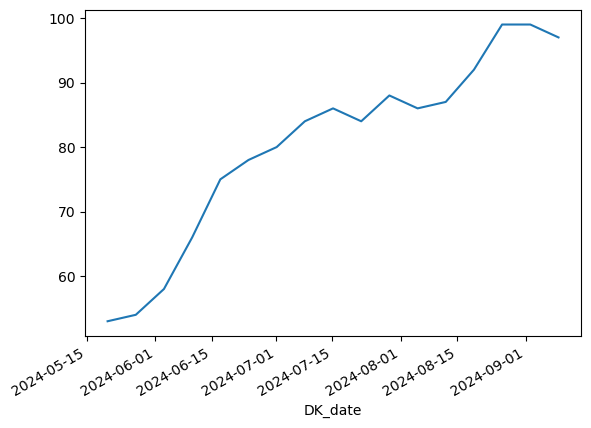

In [304]:
vyvoj2[vyvoj2['DK_titul'] == 'Pacanka']['DK_Chystám_se_číst'].plot()

<Axes: xlabel='DK_date'>

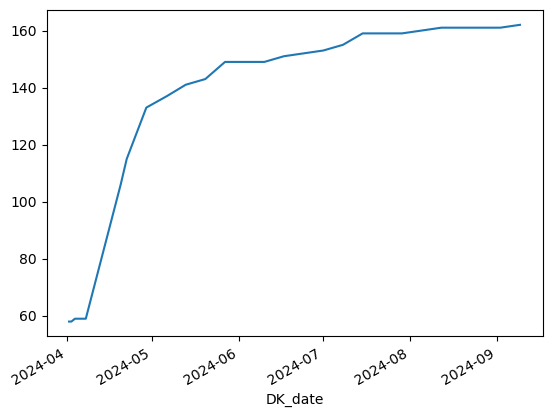

In [305]:
vyvoj2[vyvoj2['DK_titul'] == 'Hella']['DK_Chystám_se_číst'].plot()

## Syntéza (dál už to není zajímavé)

In [306]:
import numpy as np

In [9]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [11]:
df

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Estetický prožitek\n Novinka,Vlastimil Zuska,Estetický prožitek/zkušenost je jedním z klíčo...,"[estetika, zážitek, prožitek]",236.0,brožovaná vazba,130×190 mm,300 g,9788024658872,2024,...,None,None,NaN,None,None,None,None,None,None,None
1,Sen o lidské tváři,Ivan R. Vičar,Romeo a Julie jsou hrdiny středověkého příběhu...,"[sen, historie]",260.0,brožovaná vazba,130×200 mm,None,9788087373804,2024,...,None,None,NaN,None,None,None,None,None,None,None
2,Stopy osudu v čase,Mirka Langerová,Jmenuji se Mirka Langerová a narodila jsem se ...,"[radost, zbírka, romantika, smutek]",296.0,pevná vazba,120×184 mm,304 g,9788088363200,2021,...,None,None,NaN,None,None,None,None,None,None,None
3,Definice poezie,Michael Třeštík,"Definice poezie nejsou nic nového, už to napad...","[poezie, básně]",NaN,None,None,None,9788087545959,2024,...,None,None,NaN,None,None,None,None,None,None,None
4,Nasraná máma 1,Tereza Maroušková,Jak přežít těhotenství? Fakt nevim! Dula vám j...,"[porod, humor, těhotenství]",192.0,brožovaná vazba,143×201 mm,352 g,9788090815001,2021,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,"[socialismus, dobová atmosféra, 20. století, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,2018,...,None,None,NaN,None,None,None,None,None,None,None
12208,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,2012,...,None,None,NaN,None,None,None,None,None,None,None
12209,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,"[historické události, 1945, autobiografický, d...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,2015,...,None,None,NaN,None,None,None,None,None,None,None
12210,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,2002,...,None,None,NaN,None,None,None,None,None,None,None


In [309]:
df['isbn'] = df['M_isbn'].astype(str)

In [310]:
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [311]:
gr['isbn'] = gr['GR_isbn'].apply(lambda x: int(x)).astype(str)

In [312]:
dk['isbn']

0        9788027904853
1        9788020615770
2        9788072444748
3        9788076374591
4        9788024289472
             ...      
34859    9788072278879
34860    9788074565816
34861    9788024288826
34862    9788025741528
34863    9788027721405
Name: isbn, Length: 34864, dtype: object

In [313]:
dkm = dk.merge(df, on="isbn", how="inner")

In [314]:
dkm

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,NaN,None,None,None,None,None,None,None
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",3.0,400.0,56.0,150.0,...,None,None,NaN,None,None,None,None,None,None,None
2,9.788072e+12,2024-04-01 14:39:25,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,...,None,None,NaN,None,None,None,None,None,None,None
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,91.0,50.0,['autobiografické prvky'],2.0,59.0,1.0,13.0,...,None,None,NaN,None,None,None,None,None,None,None
4,9.788024e+12,2024-04-01 14:39:27,Sochař,81.0,19.0,[],1.0,28.0,2.0,46.0,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36012,9.788072e+12,2024-09-09 04:16:31,Zuta a svlečena,80.0,5.0,"['Literatura česká', 'Poezie']",NaN,5.0,NaN,1.0,...,None,None,NaN,None,None,None,None,None,None,None
36013,9.788075e+12,2024-09-09 04:16:31,Ostří ozvěny,79.0,63.0,"['Romány', 'Literatura česká', 'Sci-fi']",NaN,95.0,3.0,80.0,...,None,None,NaN,None,None,None,None,None,None,None
36014,9.788024e+12,2024-09-09 04:16:32,Ve škole i za školou,78.0,51.0,"['Povídky', 'Literatura česká']",NaN,68.0,7.0,39.0,...,None,None,NaN,None,None,None,None,None,None,None
36015,9.788026e+12,2024-09-09 04:16:32,Pod Kaštanem,78.0,52.0,"['Romány', 'Pro ženy', 'Literatura česká']",NaN,65.0,4.0,71.0,...,None,None,NaN,None,None,None,None,None,None,None


In [315]:
dkm = dkm.merge(gr, on="isbn", how="inner")

In [316]:
dkm

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,M_editoři,M_knižní_předloha,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,autorstvo
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,9.788028e+12,2024-04-29 02:00:07,Boží potměšilost by Zdeněk Řehák,2.00,1.0,0.0,"January 1, 2023",Zdeněk Řehák
1,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,9.788028e+12,2024-05-06 10:59:41,Boží potměšilost by Zdeněk Řehák,2.00,1.0,0.0,"January 1, 2023",Zdeněk Řehák
2,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,9.788028e+12,2024-05-13 03:01:26,Boží potměšilost by Zdeněk Řehák,2.00,1.0,0.0,"January 1, 2023",Zdeněk Řehák
3,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,9.788028e+12,2024-05-20 02:52:16,Boží potměšilost by Zdeněk Řehák,2.00,1.0,0.0,"January 1, 2023",Zdeněk Řehák
4,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,9.788028e+12,2024-05-27 03:05:47,Boží potměšilost by Zdeněk Řehák,2.00,1.0,0.0,"January 1, 2023",Zdeněk Řehák
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407872,9.788028e+12,2024-09-09 04:16:32,V hrůze a krvi zrozeni,69.0,57.0,"['Horory', 'Povídky', 'Literatura česká']",1.0,58.0,8.0,67.0,...,None,None,9.788028e+12,2024-08-12 03:40:32,V hrůze a krvi zrozeni by Kevin Wulfric Scherrer,3.75,12.0,1.0,"January 25, 2023",Kevin Wulfric Scherrer
407873,9.788028e+12,2024-09-09 04:16:32,V hrůze a krvi zrozeni,69.0,57.0,"['Horory', 'Povídky', 'Literatura česká']",1.0,58.0,8.0,67.0,...,None,None,9.788028e+12,2024-08-19 03:45:58,V hrůze a krvi zrozeni by Kevin Wulfric Scherrer,3.46,13.0,1.0,"January 25, 2023",Kevin Wulfric Scherrer
407874,9.788028e+12,2024-09-09 04:16:32,V hrůze a krvi zrozeni,69.0,57.0,"['Horory', 'Povídky', 'Literatura česká']",1.0,58.0,8.0,67.0,...,None,None,9.788028e+12,2024-08-26 03:33:59,V hrůze a krvi zrozeni by Kevin Wulfric Scherrer,3.46,13.0,1.0,"January 25, 2023",Kevin Wulfric Scherrer
407875,9.788028e+12,2024-09-09 04:16:32,V hrůze a krvi zrozeni,69.0,57.0,"['Horory', 'Povídky', 'Literatura česká']",1.0,58.0,8.0,67.0,...,None,None,9.788028e+12,2024-09-02 03:54:10,V hrůze a krvi zrozeni by Kevin Wulfric Scherrer,3.46,13.0,1.0,"January 25, 2023",Kevin Wulfric Scherrer


In [317]:
dkm.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'isbn', 'skore',
       'hezky_titul', 'nakladatel', 'M_titul', 'M_autorstvo', 'M_ebook',
       'M_anotace', 'M_počet_stran', 'M_vazba', 'M_rozměr', 'M_hmotnost',
       'M_isbn', 'M_rok_vydání', 'M_jazyk', 'M_původ', 'M_nakladatel',
       'M_kategorizace', 'M_cena', 'M_datum', 'M_soubor', 'M_série', 'M_díl',
       'M_edice', 'M_pro_koho', 'M_e-kniha', 'M_přečtená', 'M_styl',
       'M_originální_název', 'M_věkové_doporučení', 'M_audiokniha',
       'M_ilustrace', 'M_účel_knihy', 'M_předběžné_datum_vydání', 'M_vydání',
       'M_překlad', 'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha', 'GR_isbn', 'GR_date', 'GR_title', 'GR_rating',
       'GR_ratings_count', 'GR_reviews', 'GR_publi

In [318]:
import seaborn as sns

In [319]:
merged = pd.DataFrame(dkm[(dkm['DK_ratings_count'] > 10) & (dkm['GR_ratings_count'] > 5)].groupby(['isbn','M_počet_stran'])[['DK_Chystám_se_číst','DK_rating','DK_ratings_count','DK_Přečtených','GR_rating','GR_ratings_count']].max()).reset_index()

In [320]:
merged[['isbn','DK_ratings_count','GR_ratings_count']]

,isbn,DK_ratings_count,GR_ratings_count
0,9788011027667,21.0,7.0
1,9788011032210,33.0,6.0
2,9788011033620,14.0,9.0
3,9788011035594,110.0,182.0
4,9788020034366,15.0,14.0
...,...,...,...
290,9788090871250,36.0,89.0
291,9788090875968,102.0,25.0
292,9788090885905,11.0,6.0
293,9788090907706,45.0,39.0


In [321]:
merged.to_csv(os.path.join('../one-off-jupyters','trenovaci.csv'), index=False)

In [322]:
merged

,isbn,M_počet_stran,DK_Chystám_se_číst,DK_rating,DK_ratings_count,DK_Přečtených,GR_rating,GR_ratings_count
0,9788011027667,208.0,40.0,91.0,21.0,29.0,4.33,7.0
1,9788011032210,156.0,30.0,98.0,33.0,48.0,4.17,6.0
2,9788011033620,352.0,11.0,100.0,14.0,18.0,4.13,9.0
3,9788011035594,248.0,145.0,88.0,110.0,167.0,4.24,182.0
4,9788020034366,192.0,25.0,90.0,15.0,18.0,4.25,14.0
...,...,...,...,...,...,...,...,...
290,9788090871250,219.0,29.0,93.0,36.0,43.0,4.39,89.0
291,9788090875968,411.0,45.0,83.0,102.0,154.0,4.14,25.0
292,9788090885905,238.0,6.0,91.0,11.0,16.0,4.50,6.0
293,9788090907706,336.0,125.0,88.0,45.0,60.0,4.18,39.0


<Axes: ylabel='Density'>

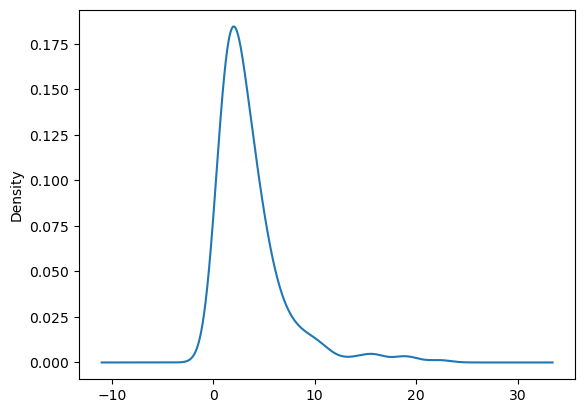

In [323]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).plot.density()

In [324]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nlargest()

isbn
9788027910014    22.333333
9788024951249    19.666667
9788027912841    18.857143
9788027910182    18.400000
9788024949949    16.312500
dtype: float64

In [325]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nsmallest()

isbn
9788088433262    0.116788
9788027720613    0.239669
9788088494065    0.259259
9788075552020    0.361702
9788076617261    0.368696
dtype: float64

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


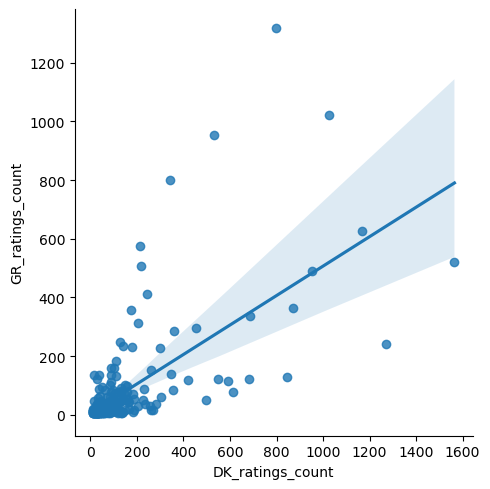

In [326]:
sns.lmplot(x='DK_ratings_count', y='GR_ratings_count', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


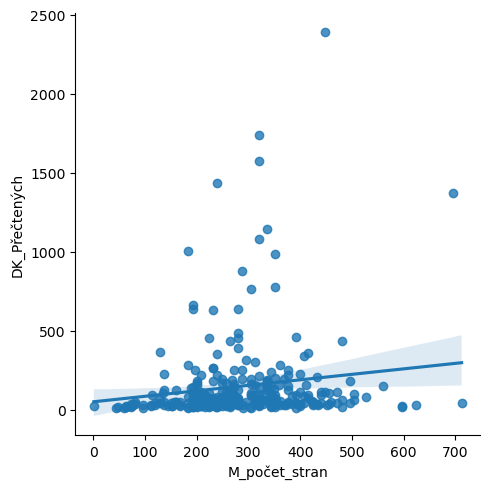

In [327]:
sns.lmplot(x='M_počet_stran', y='DK_Přečtených', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


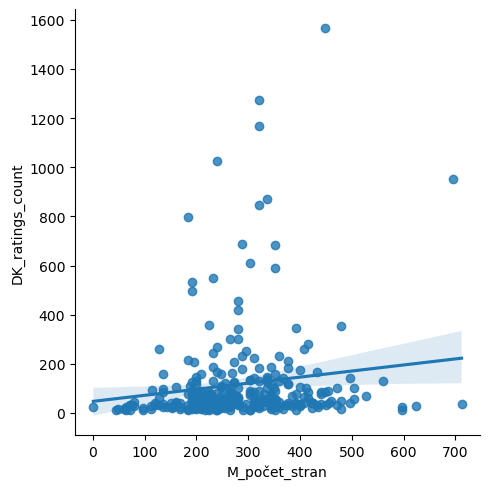

In [328]:
sns.lmplot(x='M_počet_stran', y='DK_ratings_count', data=merged)

In [329]:
zacatek = int(len(merged)*0.5)
konec = int(len(merged)*0.25)
len(merged.head(konec).tail(zacatek))

73

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


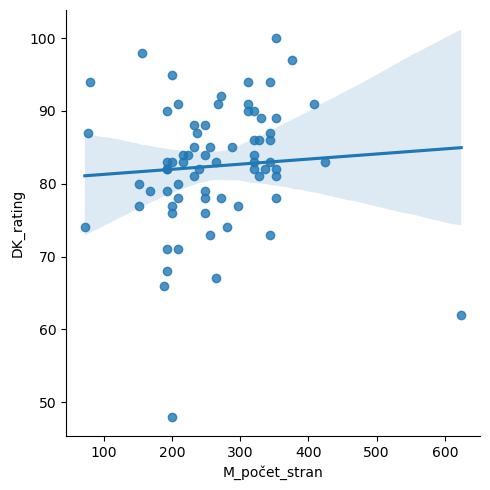

In [330]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged.head(konec).tail(zacatek).sort_values(by='M_počet_stran'))

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


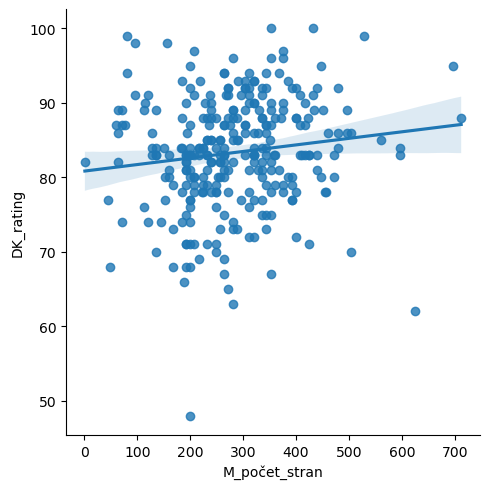

In [331]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


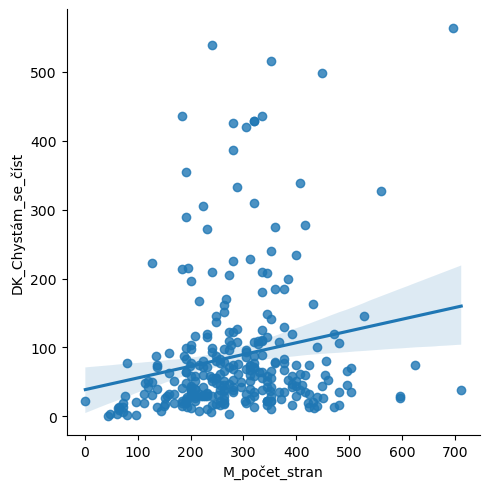

In [332]:
sns.lmplot(x='M_počet_stran', y='DK_Chystám_se_číst', data=merged)

## Co se líbí

In [333]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'isbn', 'skore',
       'hezky_titul', 'nakladatel'],
      dtype='object')

In [334]:
tagy = dk.copy()
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.replace(f"""[""",'').replace(f"""]""",'').replace(f"""'""","").split(', '))
tagy = tagy.explode('DK_tags')
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.lower())
tagy = tagy[['DK_date','DK_titul','DK_ratings_count','DK_rating','DK_tags']]
tagy = tagy[tagy['DK_date'] > week_ago]

In [335]:
tagy

,DK_date,DK_titul,DK_ratings_count,DK_rating,DK_tags
33384,2024-09-09 04:01:28,Jindřich Chalupecký: Texty a kontexty kritika ...,1.0,100.0,umění
33385,2024-09-09 04:01:28,Strach a úzkost a jak na ně,18.0,76.0,literatura česká
33385,2024-09-09 04:01:28,Strach a úzkost a jak na ně,18.0,76.0,literatura naučná
33385,2024-09-09 04:01:28,Strach a úzkost a jak na ně,18.0,76.0,psychologie a pedagogika
33386,2024-09-09 04:01:29,Skica jako prvotní vizualizace myšlenky: Kdy n...,1.0,100.0,umění
...,...,...,...,...,...
34862,2024-09-09 04:16:32,Pod Kaštanem,52.0,78.0,pro ženy
34862,2024-09-09 04:16:32,Pod Kaštanem,52.0,78.0,literatura česká
34863,2024-09-09 04:16:32,V hrůze a krvi zrozeni,57.0,69.0,horory
34863,2024-09-09 04:16:32,V hrůze a krvi zrozeni,57.0,69.0,povídky


In [336]:
romany = tagy[tagy['DK_tags'].str.contains('román',na=False)]['DK_titul'].drop_duplicates().to_list()

In [337]:
tagy['DK_tags'].nunique()

91

In [338]:
dk.sample

<bound method NDFrame.sample of             DK_isbn             DK_date                DK_titul  DK_rating  \
0      9.788028e+12 2024-04-01 14:39:23        Boží potměšilost       78.0   
1      9.788021e+12 2024-04-01 14:39:24  Oprátka za osm mrtvých       88.0   
2      9.788072e+12 2024-04-01 14:39:25                   Golem       82.0   
3      9.788076e+12 2024-04-01 14:39:26  Proč všichni odcházejí       91.0   
4      9.788024e+12 2024-04-01 14:39:27                  Sochař       81.0   
...             ...                 ...                     ...        ...   
34859  9.788072e+12 2024-09-09 04:16:31         Zuta a svlečena       80.0   
34860  9.788075e+12 2024-09-09 04:16:31            Ostří ozvěny       79.0   
34861  9.788024e+12 2024-09-09 04:16:32    Ve škole i za školou       78.0   
34862  9.788026e+12 2024-09-09 04:16:32            Pod Kaštanem       78.0   
34863  9.788028e+12 2024-09-09 04:16:32  V hrůze a krvi zrozeni       69.0   

       DK_ratings_count        

In [339]:
nejcastejsi_tagy = tagy.groupby('DK_tags').size()
nejcastejsi_tagy = nejcastejsi_tagy[nejcastejsi_tagy >= 10]
nejcastejsi_tagy = nejcastejsi_tagy.index.to_list()
len(nejcastejsi_tagy)

61

In [340]:
nejcastejsi_tagy

['architektura',
 'biografie a memoáry',
 'cestopisy a místopisy',
 'detektivky',
 'dobrodružné',
 'doprava',
 'duchovní literatura',
 'dívčí romány',
 'ekologie',
 'ekonomie a obchod',
 'erotika',
 'eseje',
 'fantasy',
 'fejetony',
 'filozofie',
 'historické romány',
 'historie',
 'hobby',
 'horory',
 'hudba a zpěv',
 'humor',
 'komiksy',
 'krimi',
 'literatura faktu',
 'literatura naučná',
 'literatura slovenská',
 'literatura světová',
 'literatura česká',
 'mezinárodní vztahy',
 'novely',
 'náboženství',
 'o literatuře',
 'obrazové publikace',
 'osobní rozvoj a styl',
 'poezie',
 'politologie',
 'povídky',
 'pragensia',
 'pro děti a mládež',
 'pro ženy',
 'právo',
 'psychologie a pedagogika',
 'publicistika',
 'příběhy',
 'příroda',
 'přírodní vědy',
 'rodina',
 'romány',
 'sci-fi',
 'sociologie',
 'společnost',
 'sport',
 'thrillery',
 'umění',
 'vojenství',
 'válečné',
 'zdravotnictví',
 'zdraví',
 'zvířata',
 'živ. prostředí',
 'žurnalistika']

In [341]:
zebricek = tagy[(tagy['DK_tags'].isin(nejcastejsi_tagy)) & (tagy['DK_titul'].isin(romany))].groupby('DK_tags')['DK_rating'].mean().sort_values(ascending=False)

In [342]:
zebricek.head(20)

DK_tags
válečné                91.000000
literatura naučná      89.000000
sci-fi                 87.055556
literatura faktu       86.000000
pro děti a mládež      84.823529
literatura světová     84.500000
dívčí romány           83.636364
biografie a memoáry    82.833333
historické romány      81.706522
krimi                  79.785714
detektivky             79.785714
pro ženy               79.637931
novely                 79.500000
literatura česká       79.113636
historie               79.000000
humor                  78.700000
thrillery              78.666667
romány                 78.046809
fantasy                77.571429
hudba a zpěv           77.000000
Name: DK_rating, dtype: float64

In [343]:
zebricek.tail(20)

DK_tags
dívčí romány            83.636364
biografie a memoáry     82.833333
historické romány       81.706522
krimi                   79.785714
detektivky              79.785714
pro ženy                79.637931
novely                  79.500000
literatura česká        79.113636
historie                79.000000
humor                   78.700000
thrillery               78.666667
romány                  78.046809
fantasy                 77.571429
hudba a zpěv            77.000000
dobrodružné             75.142857
horory                  75.000000
literatura slovenská    73.555556
filozofie               70.000000
erotika                 56.000000
pragensia                0.000000
Name: DK_rating, dtype: float64

In [344]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'isbn', 'skore',
       'hezky_titul', 'nakladatel'],
      dtype='object')

In [345]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [346]:
dk[dk['DK_titul'] == 'Rozložíš paměť']

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,isbn,skore,hezky_titul,nakladatel
271,9.788076e+12,2024-04-01 14:46:30,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,237.0,67.0,4.0,10.0,9788076373990,375.0,Marek Torčík: Rozložíš paměť,Paseka
1383,9.788076e+12,2024-04-02 10:29:20,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,238.0,67.0,4.0,10.0,9788076373990,376.0,Marek Torčík: Rozložíš paměť,Paseka
2499,9.788076e+12,2024-04-03 16:59:08,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,238.0,67.0,4.0,10.0,9788076373990,376.0,Marek Torčík: Rozložíš paměť,Paseka
3617,9.788076e+12,2024-04-05 10:10:41,Rozložíš paměť,84.0,114.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,139.0,25.0,47.0,240.0,67.0,4.0,10.0,9788076373990,379.0,Marek Torčík: Rozložíš paměť,Paseka
4732,9.788076e+12,2024-04-07 13:44:59,Rozložíš paměť,84.0,115.0,"['homosexualita', 'česká literatura', 'dospívá...",12.0,140.0,26.0,47.0,242.0,67.0,4.0,10.0,9788076373990,382.0,Marek Torčík: Rozložíš paměť,Paseka
5855,9.788076e+12,2024-04-19 23:46:17,Rozložíš paměť,85.0,128.0,"['homosexualita', 'česká literatura', 'dospívá...",15.0,154.0,29.0,54.0,285.0,72.0,5.0,12.0,9788076373990,439.0,Marek Torčík: Rozložíš paměť,Paseka
7011,9.788076e+12,2024-04-22 03:28:44,Rozložíš paměť,85.0,130.0,"['homosexualita', 'česká literatura', 'dospívá...",13.0,158.0,29.0,55.0,293.0,74.0,5.0,12.0,9788076373990,451.0,Marek Torčík: Rozložíš paměť,Paseka
8172,9.788076e+12,2024-04-29 03:10:14,Rozložíš paměť,85.0,135.0,"['Romány', 'Literatura česká', 'homosexualita'...",28.0,166.0,30.0,62.0,311.0,80.0,5.0,14.0,9788076373990,477.0,Marek Torčík: Rozložíš paměť,Paseka
9616,9.788076e+12,2024-05-06 09:57:18,Rozložíš paměť,85.0,146.0,"['Romány', 'Literatura česká', 'homosexualita'...",49.0,184.0,33.0,64.0,310.0,80.0,5.0,14.0,9788076373990,494.0,Marek Torčík: Rozložíš paměť,Paseka
10829,9.788076e+12,2024-05-13 03:17:54,Rozložíš paměť,86.0,189.0,"['Romány', 'Literatura česká', 'homosexualita'...",34.0,240.0,40.0,76.0,313.0,79.0,5.0,17.0,9788076373990,553.0,Marek Torčík: Rozložíš paměť,Paseka


In [347]:
dk.groupby(["DK_titul",pd.Grouper(freq="W",key="DK_date")])['DK_rating'].mean()

DK_titul                     DK_date   
(NE)uvěřitelný život Oty K.  2024-04-07    60.0
                             2024-04-21    60.0
                             2024-04-28    60.0
                             2024-05-05    60.0
                             2024-05-12    60.0
                                           ... 
…a přeskočila jiskra         2024-08-18    60.0
                             2024-08-25    62.0
                             2024-09-01    62.0
                             2024-09-08    58.0
                             2024-09-15    58.0
Name: DK_rating, Length: 30387, dtype: float64

## Novinky

In [348]:
gr.groupby("GR_title")['GR_date'].min().sort_values(ascending=False).head(50)

GR_title
Otilie Vranská by Radek Galaš                                              2024-09-09 03:58:07
Zpověď stárnoucí trosky, která má psa by Eva Michorová                     2024-09-09 03:44:08
Promrhaná něha by Jan Šimek                                                2024-09-09 03:35:26
Panovníci zemí českých by Petr Dvořáček                                    2024-09-09 02:56:07
Základy moderní Evropy: lekce z kulturní historie by Jiří Hanuš            2024-09-09 02:39:26
Indie: Královna z Džhánsí by Veronika Válková                              2024-09-09 02:31:41
…a přeskočila jiskra by Halina Pawlowská                                   2024-09-02 03:53:54
Mediátorka: Každý má svou pravdu by Hana Lenghartová                       2024-09-02 03:45:45
Mezera mezi zdí a parketama, část první by Jaromír František Fumas Palme   2024-09-02 03:31:56
Průvodce králičí norou by Jan Tománek                                      2024-09-02 02:57:26
Metakunsthistorie by Jakub Stejskal      

In [349]:
dk.groupby("DK_titul")['DK_date'].min().sort_values(ascending=False).head(50)

DK_titul
Kníže Bruncvík a lev                                                         2024-09-09 04:16:12
Nanebevzetí doktora Fausta                                                   2024-09-09 04:12:36
Zlomená pečeť                                                                2024-09-09 04:11:50
Prokletý Modigliani                                                          2024-09-09 04:08:32
Posázavská dráha Praha–Čerčany–Kácov s odbočkami do Dobříše a Kolína         2024-09-09 04:08:26
Zmizelá místa: Zaniklé obce a osady v Čechách a na Moravě                    2024-09-09 04:08:13
Výklad reliéfů pekařství Poilâne                                             2024-09-09 04:06:01
Příběhy spojené s objevy nových léčiv                                        2024-09-09 04:05:35
Automobily: Jména, značky a znaky                                            2024-09-09 04:03:00
Kouzlo desistence: Jak se napravují pachatelé v Čechách                      2024-09-09 04:02:07
Veřejná sbírka       

In [350]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.005]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)}&nbsp;%""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])

In [351]:
nakladatelstvo

,nakladatel,podil
193,Motto,"11,1&nbsp;%"
190,Moba,"10,2&nbsp;%"
123,Host,"7,3&nbsp;%"
139,Kalibr,"6,1&nbsp;%"
46,Bílá vrána,"4,6&nbsp;%"
41,Bourdon,"4,1&nbsp;%"
126,Ikar CZ,"3,9&nbsp;%"
20,Argo,"3,5&nbsp;%"
235,Paseka,"3,3&nbsp;%"
87,Epocha,"3,3&nbsp;%"


In [352]:
dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == 'Paseka')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,isbn,skore,hezky_titul,nakladatel
27934,9.788076e+12,2024-08-12 03:45:56,"Zmizelá Praha: Vesnice, usedlosti a dvory: Pra...",93.0,3.0,"['Literatura česká', 'Historie', 'Pragensia']",NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,9788076374027,NaN,Jana Viktorínová Lubomír Procházka Martin Čerň...,Paseka
27949,9.788076e+12,2024-08-12 03:46:11,Husité na Žižkově: Pomíjivá paměť pražské peri...,85.0,11.0,"['Literatura naučná', 'Historie', 'Pragensia']",2.0,12.0,2.0,6.0,15.0,6.0,2.0,NaN,9788076374126,27.0,Petr Čornej: Husité na Žižkově: Pomíjivá paměť...,Paseka
28004,9.788076e+12,2024-08-12 03:47:03,Třicetiletá válka: Stručná historie,81.0,15.0,"['Literatura naučná', 'Historie']",2.0,19.0,1.0,13.0,25.0,12.0,1.0,1.0,9788076374034,44.0,Jan Kilian: Třicetiletá válka: Stručná historie,Paseka
28026,9.788076e+12,2024-08-12 03:47:26,Velké dějiny zemí Koruny české,80.0,1.0,"['Literatura naučná', 'Historie', 'Zdravotnict...",NaN,2.0,NaN,12.0,16.0,9.0,NaN,NaN,9788076373310,18.0,Karel Černý kolektiv: Velké dějiny zemí Koruny...,Paseka
28170,9.788076e+12,2024-08-12 03:49:27,Fosilie,73.0,194.0,"['Romány', 'Literatura česká']",16.0,254.0,39.0,42.0,208.0,46.0,6.0,10.0,9788076374003,462.0,Michal Kašpárek: Fosilie,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34525,9.788076e+12,2024-09-09 04:14:10,Proč všichni odcházejí,84.0,97.0,"['Novely', 'Literatura česká']",2.0,124.0,1.0,40.0,193.0,49.0,NaN,9.0,9788076374591,317.0,Zuzana Dostálová: Proč všichni odcházejí,Paseka
34613,9.788076e+12,2024-09-09 04:14:49,Karneval zvířat,75.0,147.0,"['Romány', 'Literatura česká']",6.0,189.0,15.0,58.0,111.0,26.0,1.0,3.0,9788076373402,300.0,Zuzana Dostálová: Karneval zvířat,Paseka
34636,9.788076e+12,2024-09-09 04:14:58,Bažina v obýváku a jiná dobrodružství,83.0,7.0,"['Komiksy', 'Literatura česká', 'Pro děti a ml...",NaN,12.0,2.0,NaN,12.0,NaN,2.0,NaN,9788076372955,24.0,Kristýna Plíhalová: Bažina v obýváku a jiná do...,Paseka
34738,9.788076e+12,2024-09-09 04:15:43,Přístav,73.0,24.0,"['Romány', 'Literatura česká']",NaN,25.0,4.0,2.0,8.0,2.0,NaN,3.0,9788076373983,33.0,Magdalena Bujabéza Rejžková: Přístav,Paseka


In [353]:
str(datetime.datetime.now())

'2024-09-13 08:14:58.127078'

In [354]:
def koho_vydavaji(nakl):
    global dk
    top = pd.DataFrame(dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].max() - dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].min()).groupby('hezky_titul').sum().reset_index()
    print(top)
    top = top.groupby('hezky_titul')['skore'].max().nlargest(3).index.to_list()
    print(top)
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik > 3:
        return top2[:3]
    else:
        return top2

In [355]:
print(koho_vydavaji('Paseka'))

                                          hezky_titul  skore
0   Jakub Sedláček: Neviditelné řemeslo: Tajemství...    3.0
1                               Jakub Šponer: Ekstase    1.0
2     Jan Kilian: Třicetiletá válka: Stručná historie    1.0
3   Jana Viktorínová Lubomír Procházka Martin Čerň...    0.0
4   Karel Černý kolektiv: Velké dějiny zemí Koruny...    1.0
5   Kristýna Plíhalová: Bažina v obýváku a jiná do...    1.0
6                Magdalena Bujabéza Rejžková: Přístav    1.0
7                        Marek Torčík: Rozložíš paměť   43.0
8                            Michal Kašpárek: Fosilie   38.0
9                            Miroslav Hlaučo: Letnice   44.0
10                    Ondřej Trhoň: Ještě jeden level    3.0
11  Petr Čornej: Husité na Žižkově: Pomíjivá paměť...    2.0
12         Petr Šabach: Láska je kurva a jiné povídky    1.0
13              Tereza Nováková: Co se stalo Veronice    1.0
14                  Zuzana Dostálová: Karneval zvířat    3.0
15           Zuzana Dost